In [1]:
# Diagnostic Dataset with Random Oversampling
# No columns dropped
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import warnings
import time
warnings.filterwarnings("ignore")

from sklearn.preprocessing import PowerTransformer, QuantileTransformer

from sklearn import metrics
from sklearn.metrics import auc, f1_score, plot_roc_curve, precision_score, recall_score


In [2]:
df = pd.read_csv("Diagnostic_Data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df['diagnosis'].replace({'M':1, 'B':0}, inplace=True)

In [4]:
df.drop(columns=['Unnamed: 32', 'id'], inplace = True)
df.dtypes

diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [5]:
df.shape

(569, 31)

In [6]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
over_sampler = RandomOverSampler(sampling_strategy="minority")

X = df.iloc[:, 1:31]
Y = df.iloc[:, 0]

X_oversampled, Y_oversampled = over_sampler.fit_resample(X, Y)
counter = 0
o_df = pd.DataFrame()
for i in list(df.columns)[1:31]:
    o_df[i] = X_oversampled[i]
    counter += 1
    
o_df["diagnosis"] = Y_oversampled
df = o_df.copy()
Counter(Y_oversampled)

Counter({1: 357, 0: 357})

In [7]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,...,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,14.894985,19.761204,97.316359,730.552381,0.097645,0.112900,0.104482,0.057426,0.183938,0.062701,...,26.362773,114.856541,1002.981653,0.134709,0.278054,0.308514,0.128657,0.296634,0.085176,0.500000
std,3.795325,4.234812,26.219700,387.433559,0.013965,0.055671,0.084845,0.041633,0.028112,0.007238,...,6.088015,36.273968,626.452063,0.023056,0.169398,0.215086,0.068464,0.067598,0.019086,0.500351
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,12.042500,16.832500,77.587500,445.475000,0.087720,0.070612,0.035175,0.023242,0.163725,0.057240,...,21.965000,86.677500,546.400000,0.119325,0.160775,0.138175,0.073048,0.253425,0.072080,0.000000
50%,14.025000,19.540000,91.170000,603.150000,0.097330,0.104950,0.087410,0.049380,0.181250,0.061490,...,26.080000,105.850000,779.800000,0.134700,0.236200,0.280450,0.122500,0.286800,0.081045,0.500000
75%,17.570000,22.100000,115.800000,961.550000,0.106575,0.138900,0.153600,0.086240,0.197550,0.066143,...,30.485000,139.900000,1341.000000,0.149350,0.363300,0.423400,0.180475,0.321750,0.093312,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [11]:
qt = QuantileTransformer(n_quantiles=500, output_distribution='normal')
columns = list(df.columns)
for i in columns[:30]:
    df[i] = qt.fit_transform(np.array(df[i]).reshape(-1,1))
    print(f"{i} transformation Successful!")

radius_mean transformation Successful!
texture_mean transformation Successful!
perimeter_mean transformation Successful!
area_mean transformation Successful!
smoothness_mean transformation Successful!
compactness_mean transformation Successful!
concavity_mean transformation Successful!
concave points_mean transformation Successful!
symmetry_mean transformation Successful!
fractal_dimension_mean transformation Successful!
radius_se transformation Successful!
texture_se transformation Successful!
perimeter_se transformation Successful!
area_se transformation Successful!
smoothness_se transformation Successful!
compactness_se transformation Successful!
concavity_se transformation Successful!
concave points_se transformation Successful!
symmetry_se transformation Successful!
fractal_dimension_se transformation Successful!
radius_worst transformation Successful!
texture_worst transformation Successful!
perimeter_worst transformation Successful!
area_worst transformation Successful!
smoothne

In [12]:
corr = df.corr()
pairs = []
for i in list(corr.columns)[:30]:
    for j in list(corr.columns)[:30]:
        if abs(corr.loc[i,j])>0.8 and corr.loc[i,j] != 1:
            pairs.append([i, j])
            if [i, j] not in pairs or [j, i] not in pairs:
                print(f'{i} '.ljust(30), f'{j} '.ljust(30), corr.loc[i,j])

radius_mean                    perimeter_mean                 0.9977025928410665
radius_mean                    area_mean                      0.9825446868216803
radius_mean                    radius_worst                   0.95317675189473
radius_mean                    perimeter_worst                0.9500449797805134
radius_mean                    area_worst                     0.9532622663440458
texture_mean                   texture_worst                  0.9036293441282764
perimeter_mean                 area_mean                      0.9796900427514988
perimeter_mean                 radius_worst                   0.9532408667830478
perimeter_mean                 perimeter_worst                0.954642396504641
perimeter_mean                 area_worst                     0.9524628949505727
area_mean                      radius_worst                   0.9761381594403785
area_mean                      perimeter_worst                0.9726955952293681
area_mean                      

In [13]:
# Creating a list of columns with only the columns that represent the mean.
mean_columns = ["diagnosis", 'radius_mean', 'texture_mean', 'perimeter_mean',
             'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
             'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

# Creating a list of columns with only the columns that represent the worst values.
worst_columns = ["diagnosis", 'radius_worst', 'texture_worst',
              'perimeter_worst', 'area_worst', 'smoothness_worst',
              'compactness_worst', 'concavity_worst', 'concave points_worst',
              'symmetry_worst', 'fractal_dimension_worst']

se_columns = ["diagnosis", 'radius_se', 'texture_se',
              'perimeter_se', 'area_se', 'smoothness_se',
              'compactness_se', 'concavity_se', 'concave points_se',
              'symmetry_se', 'fractal_dimension_se']

In [14]:
df.shape
df.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'diagnosis'],
      dtype='object')

In [15]:
df['diagnosis']

0      1
1      1
2      1
3      1
4      1
      ..
709    1
710    1
711    1
712    1
713    1
Name: diagnosis, Length: 714, dtype: int64

In [16]:
X = df.iloc[:, 0:30].values
Y = df.iloc[:, 30].values

def classification_evaluation(classifier, X, Y, classifier_name, columns):
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    accuracy_arr = np.zeros(shape=(1,10))
    f1_score_arr = np.zeros(shape=(1,10))
    precision_arr = np.zeros(shape=(1,10))
    recall_arr = np.zeros(shape=(1,10))
    feature_importance_arr = np.zeros(shape=(1,30))
    time_arr = []
    

    cv = StratifiedKFold(n_splits=10)
    fig, ax = plt.subplots(figsize=(15, 10))
    start_time = time.time()
    for i, (train, test) in enumerate(cv.split(X, Y)):
        itr_start_time = time.time()
        classifier.fit(X[train], Y[train])
        itr_end_time = time.time()
        viz = plot_roc_curve(classifier, X[test], Y[test],
                             name=f'ROC fold {i}',
                             alpha=0.3, lw=1, ax=ax)
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)
        
        try:
            feature_importance_arr += classifier.feature_importances_
        except:
            try:
                feature_importance_arr += np.array([abs(i) for i in classifier.coef_[0]])
            except:
                feature_importance_arr += np.array([abs(i) for i in permutation_importance(classifier, X[test], Y[test]).importances_mean])
            
        
        predict = classifier.predict(X[test])
        accuracy = classifier.score(X[test], Y[test])
        accuracy_arr[0, i] = accuracy
        f1 = f1_score(predict, Y[test])
        f1_score_arr[0, i] = f1
        precision = precision_score(predict, Y[test])
        precision_arr[0, i] = precision
        recall = recall_score(predict, Y[test])
        recall_arr[0, i] = recall
        train, test = train, test
        time_arr.append(itr_end_time-itr_start_time)
        print(f"Fold-{i}:  accuracy: {accuracy}  f1-score: {f1}  precision: {precision}  recall: {recall}  time: {itr_end_time-itr_start_time}")
    end_time = time.time()
    
    print()
    print(f"Classification Report for {classifier_name}")
    print("Average Accuracy :", np.mean(accuracy_arr))
    print("Average F1-Score :", np.mean(f1_score_arr))
    print("Average Precision :", np.mean(precision_arr))
    print("Average Recall :", np.mean(recall_arr))
    print("Total Time :", end_time - start_time)
    
    fig = plt.figure(figsize=(15, 10))
    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
            label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
            label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
            lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                    label=r'$\pm$ 1 std. dev.')

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
           title=f"Receiver Operating Characteristic for {classifier_name}")
    ax.legend(loc="lower right")
    plt.show()
    
    feature_importance_arr /= 10
    
    fig = plt.figure(figsize=(15, 10))
    
    plt.subplot(1, 2, 1)
    feature_imp = pd.Series(feature_importance_arr[0], index = columns[0:30])
    feature_imp.nlargest(10).plot(kind = 'bar')
    plt.title(f"Feature Importance of {classifier_name}")
    
    
    plt.subplot(1,2,2)
    plt.plot(time_arr, 'go-', color="darkblue")
    plt.plot([max(time_arr) for i in range(10)], color='lightcoral', label='UL')
    plt.plot([min(time_arr) for i in range(10)], color='lightgreen', label='LL')
    plt.title("Training time for every iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Time in sec.")
    plt.legend(loc="upper right")
    
    plt.show()
    
    return np.mean(accuracy_arr), np.mean(f1_score_arr), np.mean(precision_arr), np.mean(recall_arr), mean_auc

Fold-0:  accuracy: 1.0  f1-score: 1.0  precision: 1.0  recall: 1.0  time: 0.40324902534484863
Fold-1:  accuracy: 0.9583333333333334  f1-score: 0.9577464788732395  precision: 0.9444444444444444  recall: 0.9714285714285714  time: 0.009360790252685547
Fold-2:  accuracy: 0.9444444444444444  f1-score: 0.9428571428571428  precision: 0.9166666666666666  recall: 0.9705882352941176  time: 0.006291866302490234
Fold-3:  accuracy: 0.9444444444444444  f1-score: 0.9444444444444444  precision: 0.9444444444444444  recall: 0.9444444444444444  time: 0.0073070526123046875
Fold-4:  accuracy: 0.971830985915493  f1-score: 0.9722222222222222  precision: 0.9722222222222222  recall: 0.9722222222222222  time: 0.005908012390136719
Fold-5:  accuracy: 0.9859154929577465  f1-score: 0.9859154929577464  precision: 0.9722222222222222  recall: 1.0  time: 0.006785869598388672
Fold-6:  accuracy: 0.9859154929577465  f1-score: 0.9863013698630138  precision: 1.0  recall: 0.972972972972973  time: 0.0069081783294677734
Fold-7

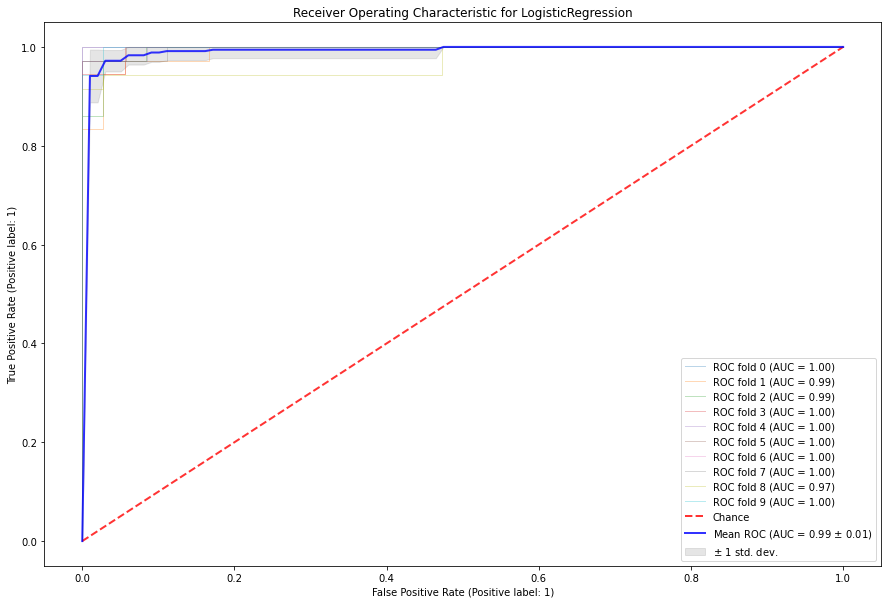

<Figure size 1080x720 with 0 Axes>

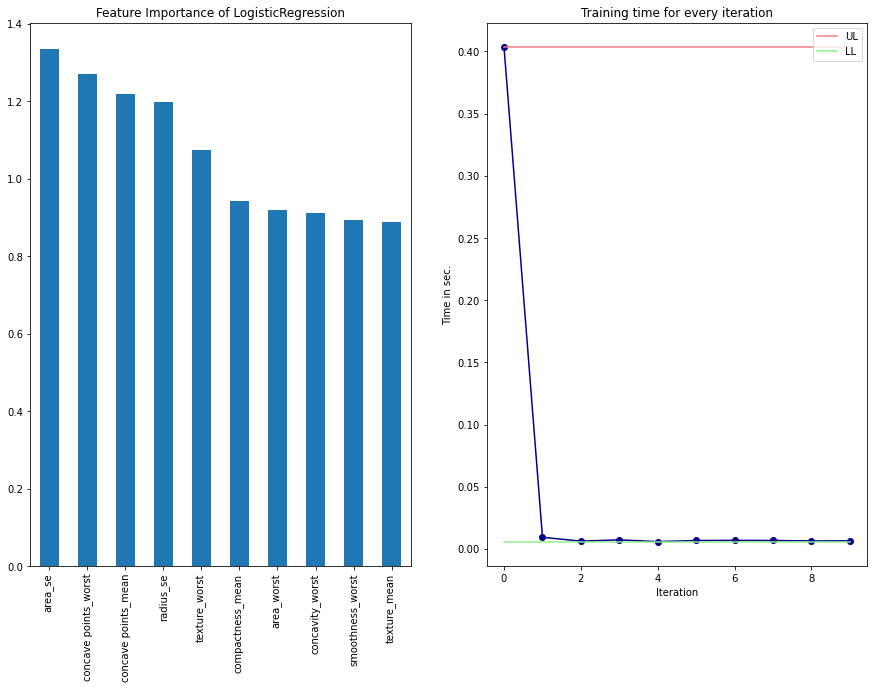

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.inspection import permutation_importance
classifier = LogisticRegression()
lr_acc, lr_f1, lr_precision, lr_recall, lr_auc = classification_evaluation(classifier, X, Y, "LogisticRegression", columns)


Fold-0:  accuracy: 0.9444444444444444  f1-score: 0.9444444444444444  precision: 0.9444444444444444  recall: 0.9444444444444444  time: 0.0005588531494140625
Fold-1:  accuracy: 0.9027777777777778  f1-score: 0.9014084507042254  precision: 0.8888888888888888  recall: 0.9142857142857143  time: 0.0008530616760253906
Fold-2:  accuracy: 0.9305555555555556  f1-score: 0.927536231884058  precision: 0.8888888888888888  recall: 0.9696969696969697  time: 0.0006818771362304688
Fold-3:  accuracy: 0.9722222222222222  f1-score: 0.9714285714285714  precision: 0.9444444444444444  recall: 1.0  time: 0.000720977783203125
Fold-4:  accuracy: 0.9436619718309859  f1-score: 0.9444444444444444  precision: 0.9444444444444444  recall: 0.9444444444444444  time: 0.0007228851318359375
Fold-5:  accuracy: 0.9577464788732394  f1-score: 0.9589041095890412  precision: 0.9722222222222222  recall: 0.9459459459459459  time: 0.0006442070007324219
Fold-6:  accuracy: 0.9295774647887324  f1-score: 0.9295774647887323  precision: 0

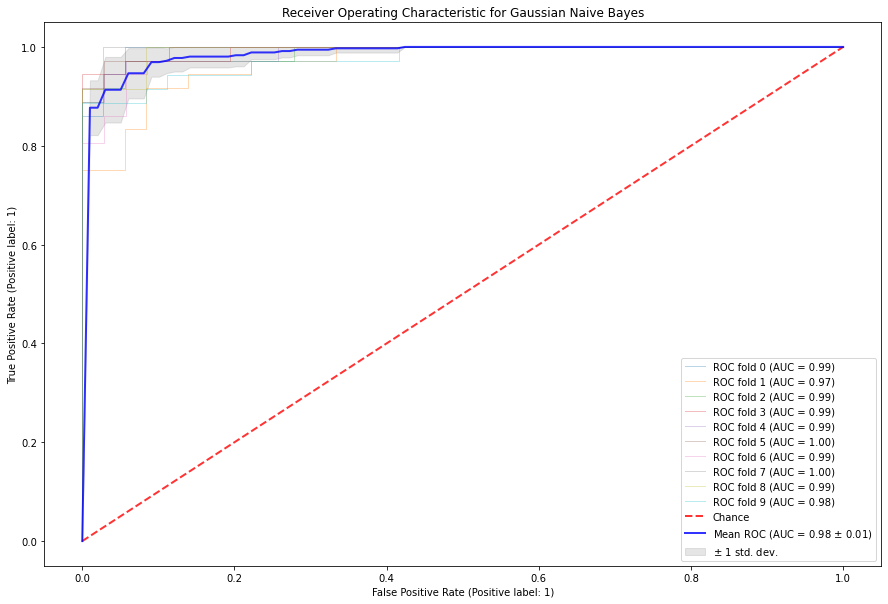

<Figure size 1080x720 with 0 Axes>

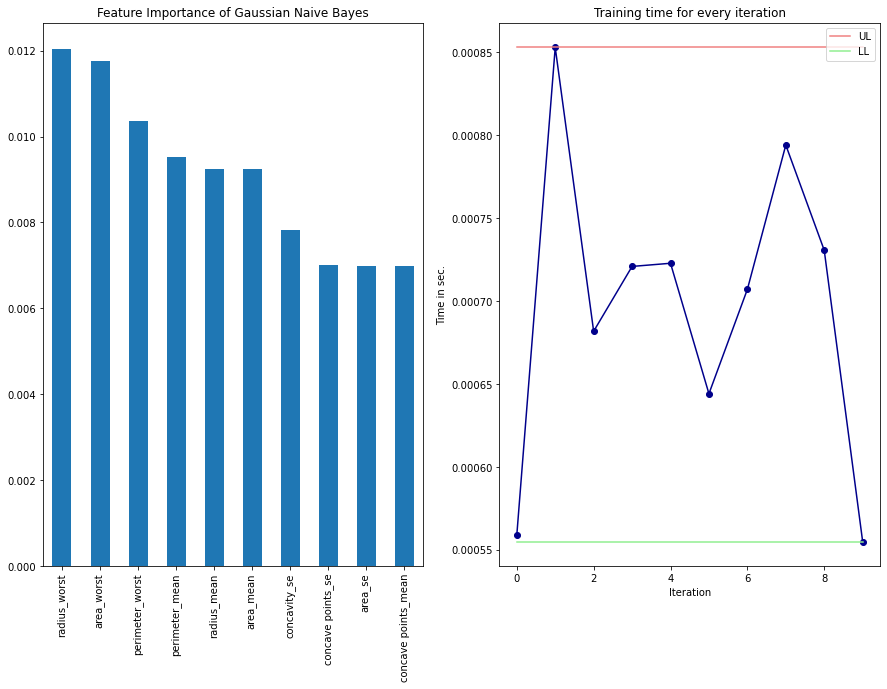

In [105]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
gn_acc, gn_f1, gn_precision, gn_recall, gn_auc = classification_evaluation(classifier, X, Y, "Gaussian Naive Bayes", list(df.columns))

Fold-0:  accuracy: 0.9583333333333334  f1-score: 0.9589041095890412  precision: 0.9722222222222222  recall: 0.9459459459459459  time: 0.1275923252105713
Fold-1:  accuracy: 0.9305555555555556  f1-score: 0.9315068493150684  precision: 0.9444444444444444  recall: 0.918918918918919  time: 0.12431120872497559
Fold-2:  accuracy: 0.9444444444444444  f1-score: 0.9428571428571428  precision: 0.9166666666666666  recall: 0.9705882352941176  time: 0.12280988693237305
Fold-3:  accuracy: 1.0  f1-score: 1.0  precision: 1.0  recall: 1.0  time: 0.12525725364685059
Fold-4:  accuracy: 1.0  f1-score: 1.0  precision: 1.0  recall: 1.0  time: 0.12567496299743652
Fold-5:  accuracy: 0.971830985915493  f1-score: 0.972972972972973  precision: 1.0  recall: 0.9473684210526315  time: 0.1256110668182373
Fold-6:  accuracy: 0.971830985915493  f1-score: 0.972972972972973  precision: 1.0  recall: 0.9473684210526315  time: 0.12408185005187988
Fold-7:  accuracy: 1.0  f1-score: 1.0  precision: 1.0  recall: 1.0  time: 0.123

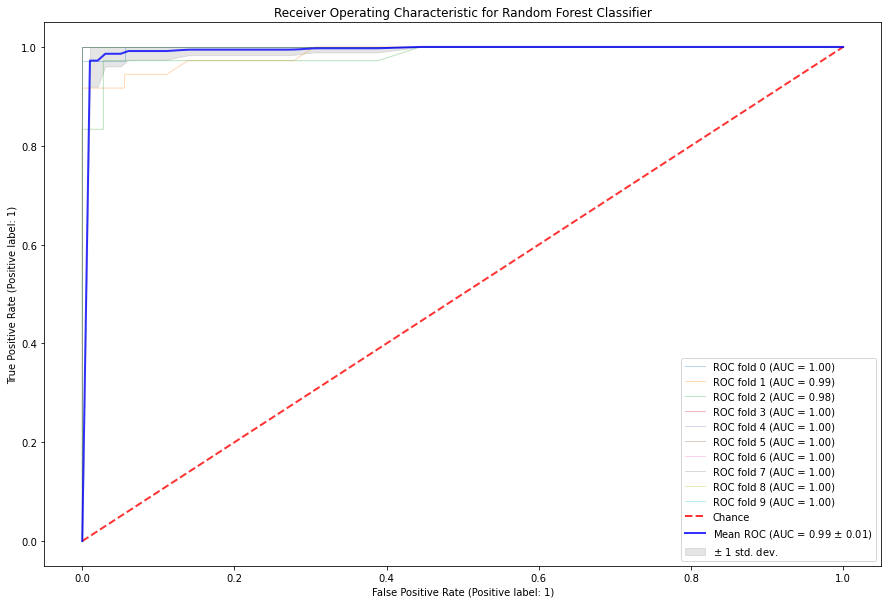

<Figure size 1080x720 with 0 Axes>

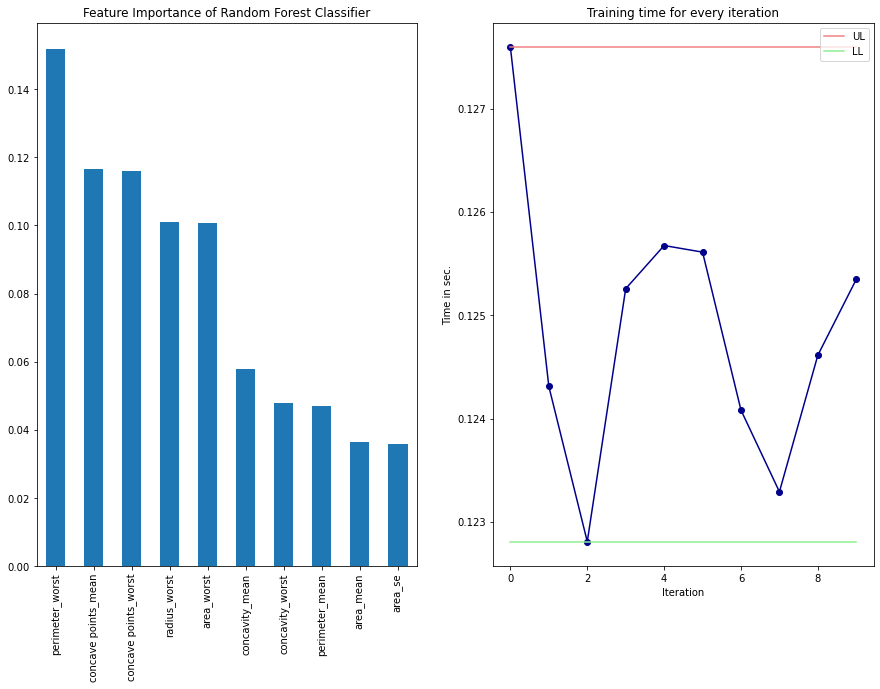

In [106]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=100)
rf_acc, rf_f1, rf_precision, rf_recall, rf_auc = classification_evaluation(classifier, X, Y, "Random Forest Classifier", list(df.columns))

Fold-0:  accuracy: 0.9861111111111112  f1-score: 0.9863013698630138  precision: 1.0  recall: 0.972972972972973  time: 0.0004899501800537109
Fold-1:  accuracy: 0.9444444444444444  f1-score: 0.9428571428571428  precision: 0.9166666666666666  recall: 0.9705882352941176  time: 0.0003180503845214844
Fold-2:  accuracy: 0.9722222222222222  f1-score: 0.9714285714285714  precision: 0.9444444444444444  recall: 1.0  time: 0.0001862049102783203
Fold-3:  accuracy: 0.9722222222222222  f1-score: 0.9714285714285714  precision: 0.9444444444444444  recall: 1.0  time: 0.00044918060302734375
Fold-4:  accuracy: 0.971830985915493  f1-score: 0.9714285714285714  precision: 0.9444444444444444  recall: 1.0  time: 0.0005328655242919922
Fold-5:  accuracy: 0.971830985915493  f1-score: 0.9714285714285714  precision: 0.9444444444444444  recall: 1.0  time: 0.0003170967102050781
Fold-6:  accuracy: 0.9859154929577465  f1-score: 0.9863013698630138  precision: 1.0  recall: 0.972972972972973  time: 0.0004191398620605469
F

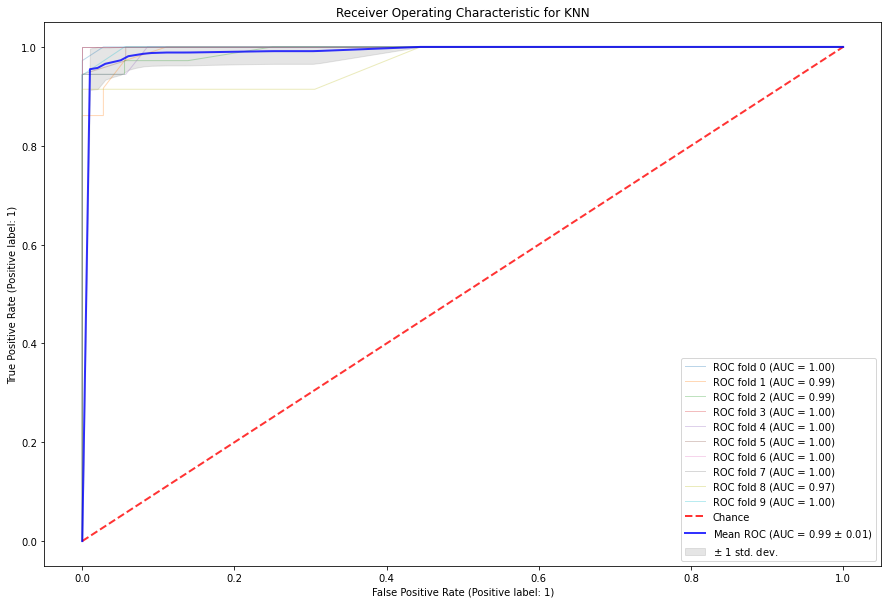

<Figure size 1080x720 with 0 Axes>

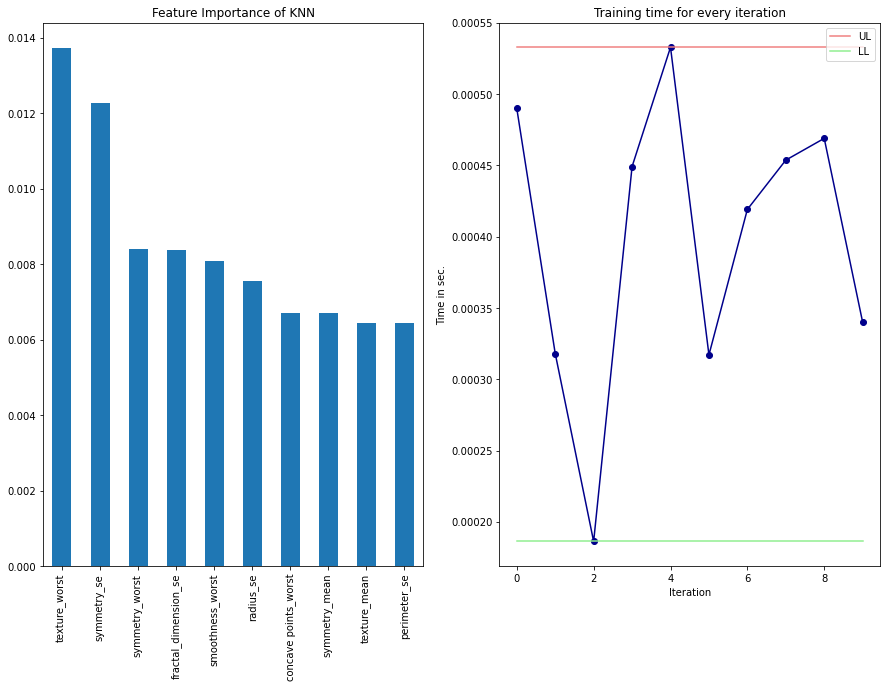

In [19]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=10)
kf_acc, kf_f1, kf_precision, kf_recall, kf_auc = classification_evaluation(classifier, X, Y, "KNN", list(df.columns))

Fold-0:  accuracy: 1.0  f1-score: 1.0  precision: 1.0  recall: 1.0  time: 0.1262211799621582
Fold-1:  accuracy: 0.9444444444444444  f1-score: 0.9444444444444444  precision: 0.9444444444444444  recall: 0.9444444444444444  time: 0.1033179759979248
Fold-2:  accuracy: 0.9444444444444444  f1-score: 0.9428571428571428  precision: 0.9166666666666666  recall: 0.9705882352941176  time: 0.10204219818115234
Fold-3:  accuracy: 1.0  f1-score: 1.0  precision: 1.0  recall: 1.0  time: 0.10569000244140625
Fold-4:  accuracy: 1.0  f1-score: 1.0  precision: 1.0  recall: 1.0  time: 0.10629773139953613
Fold-5:  accuracy: 1.0  f1-score: 1.0  precision: 1.0  recall: 1.0  time: 0.10964202880859375
Fold-6:  accuracy: 0.9859154929577465  f1-score: 0.9863013698630138  precision: 1.0  recall: 0.972972972972973  time: 0.10407280921936035
Fold-7:  accuracy: 1.0  f1-score: 1.0  precision: 1.0  recall: 1.0  time: 0.10576891899108887
Fold-8:  accuracy: 0.971830985915493  f1-score: 0.9722222222222222  precision: 1.0  re

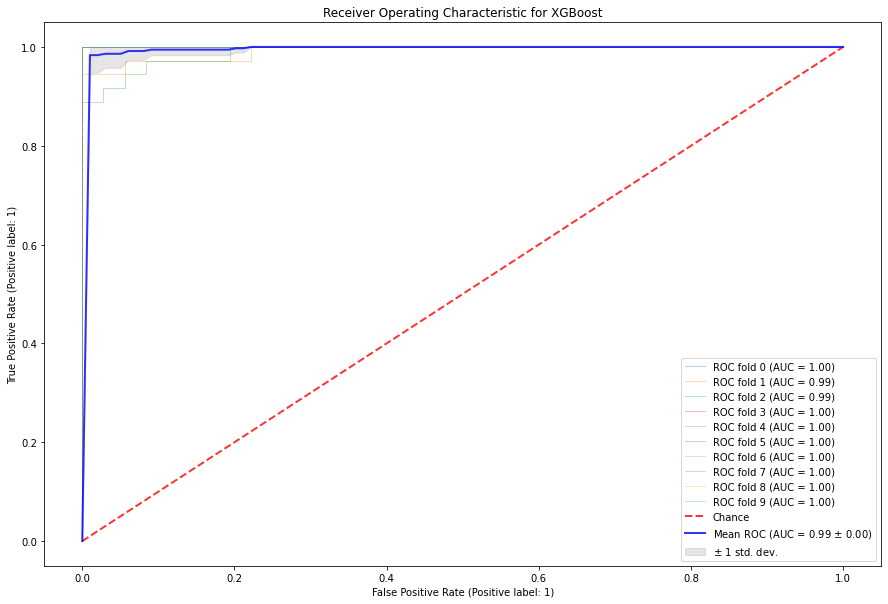

<Figure size 1080x720 with 0 Axes>

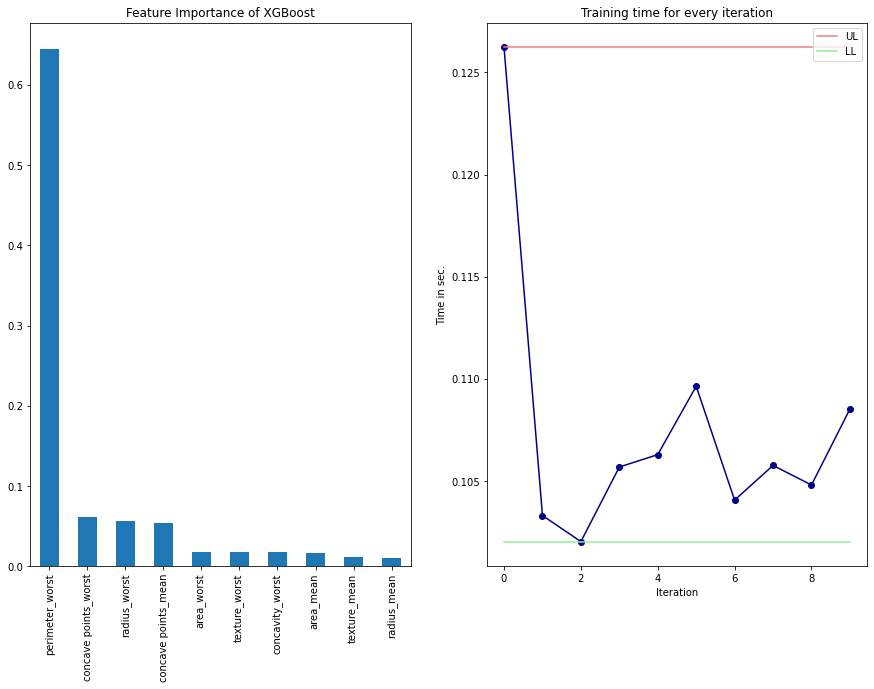

In [109]:
from xgboost import XGBClassifier

classifier = XGBClassifier(n_estimators=120,use_label_encoder=False, disable_default_eval_metric=1)
xg_acc, xg_f1, xg_precision, xg_recall, xg_auc = classification_evaluation(classifier, X, Y, "XGBoost", list(df.columns))